In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import numpy as np
from sklearn.preprocessing import Imputer

%matplotlib inline

import pylab as pl


import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.grid_search import GridSearchCV
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

df = pd.read_csv('ethylene_CO.txt', delim_whitespace=True, skiprows=[0], header=None)
df = df.rename(columns = {0:'Time (seconds)', 1:'CO2 conc (ppm)', 2:'Ethylene conc (ppm)', 3:'Sensor1',4:'Sensor2',5:'Sensor3',6:'Sensor4',7:'Sensor5',8:'Sensor6',9:'Sensor7',10:'Sensor8',11:'Sensor9',12:'Sensor10',13:'Sensor11',14:'Sensor12',15:'Sensor13',16:'Sensor14',17:'Sensor15',18:'Sensor16'})


In [2]:
df.head()

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16
0,0.00,0.0,0.0,-50.85,-1.95,-41.82,1.30,-4.07,-28.73,-13.49,-3.25,55139.95,50669.50,9626.26,9762.62,24544.02,21420.68,7650.61,6928.42
1,0.01,0.0,0.0,-49.40,-5.53,-42.78,0.49,3.58,-34.55,-9.59,5.37,54395.77,50046.91,9433.20,9591.21,24137.13,20930.33,7498.79,6800.66
2,0.01,0.0,0.0,-40.04,-16.09,-27.59,0.00,-7.16,-42.14,-12.52,-5.86,53960.02,49299.30,9324.40,9449.81,23628.90,20504.94,7369.67,6697.47
3,0.03,0.0,0.0,-47.14,-10.57,-32.28,4.40,-11.22,-37.94,-7.16,-1.14,53047.71,48907.00,9170.64,9305.58,23101.66,20101.42,7285.13,6578.52
4,0.04,0.0,0.0,-33.58,-20.79,-33.25,6.03,3.42,-34.22,-14.46,8.31,52700.28,48330.96,9073.64,9163.47,22689.54,19694.07,7156.74,6468.32


Text(0, 0.5, 'CO conc (ppm)')

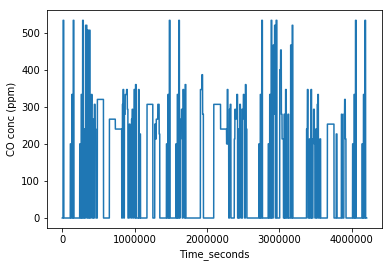

In [6]:
df['CO2 conc (ppm)'].plot.line()
plt.xlabel('Time_seconds')
plt.ylabel('CO conc (ppm)')

Text(0, 0.5, 'Ethylene conc (ppm)')

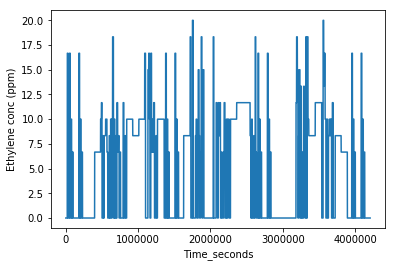

In [5]:
df['Ethylene conc (ppm)'].plot.line()
plt.xlabel('Time_seconds')
plt.ylabel('Ethylene conc (ppm)')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4208261 entries, 0 to 4208260
Data columns (total 19 columns):
Time (seconds)         float64
CO2 conc (ppm)         float64
Ethylene conc (ppm)    float64
Sensor1                float64
Sensor2                float64
Sensor3                float64
Sensor4                float64
Sensor5                float64
Sensor6                float64
Sensor7                float64
Sensor8                float64
Sensor9                float64
Sensor10               float64
Sensor11               float64
Sensor12               float64
Sensor13               float64
Sensor14               float64
Sensor15               float64
Sensor16               float64
dtypes: float64(19)
memory usage: 610.0 MB


In [8]:
df.describe()

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16
count,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06,4.208261e+06
mean,2.104459e+04,1.276202e+02,5.320436e+00,2.065617e+03,5.062184e+02,4.372539e+03,4.799250e+03,1.894957e+03,2.214692e+03,5.086639e+03,5.385428e+03,1.186241e+03,1.219252e+03,4.871079e+03,3.926250e+03,9.281877e+02,1.035772e+03,5.289323e+03,4.309685e+03
std,1.214998e+04,1.607772e+02,5.624127e+00,7.902609e+02,1.530128e+03,1.608018e+03,1.733017e+03,4.395373e+02,4.353987e+02,1.966451e+03,2.072383e+03,4.531719e+02,4.308765e+02,1.707681e+03,1.364496e+03,1.677561e+02,1.741085e+02,1.984057e+03,1.584038e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.262000e+01,-3.649000e+01,-4.504000e+01,-8.940000e+00,-1.219000e+01,-4.214000e+01,-2.322000e+01,-1.382000e+01,1.597400e+02,2.153100e+02,8.622200e+02,8.654900e+02,6.095700e+02,6.738900e+02,5.467300e+02,4.885800e+02
25%,1.052123e+04,0.000000e+00,0.000000e+00,1.323470e+03,9.120000e+00,2.986960e+03,3.282310e+03,1.503460e+03,1.856650e+03,3.241950e+03,3.448620e+03,9.343300e+02,9.419200e+02,3.435680e+03,2.728930e+03,8.083400e+02,9.102500e+02,3.642120e+03,2.805070e+03
50%,2.104591e+04,0.000000e+00,6.670000e+00,1.789090e+03,3.889000e+01,4.494330e+03,4.946720e+03,1.984550e+03,2.272780e+03,5.224880e+03,5.537910e+03,1.140320e+03,1.176600e+03,5.016130e+03,4.120240e+03,9.298600e+02,1.060700e+03,5.320550e+03,4.543040e+03
75%,3.156678e+04,2.666700e+02,1.000000e+01,2.869440e+03,1.589000e+02,5.658290e+03,6.178210e+03,2.262740e+03,2.566470e+03,6.719280e+03,7.104200e+03,1.543660e+03,1.557780e+03,6.126830e+03,4.967480e+03,1.033490e+03,1.161370e+03,6.739320e+03,5.565070e+03
max,4.208755e+04,5.333300e+02,2.000000e+01,3.553640e+03,2.811651e+04,8.641340e+03,9.221020e+03,2.904040e+03,3.502110e+03,9.883500e+03,1.052104e+04,5.513995e+04,5.066950e+04,9.626260e+03,9.762620e+03,2.454402e+04,2.142068e+04,1.066530e+04,7.874490e+03


Text(0, 0.5, 'Sensor Reading')

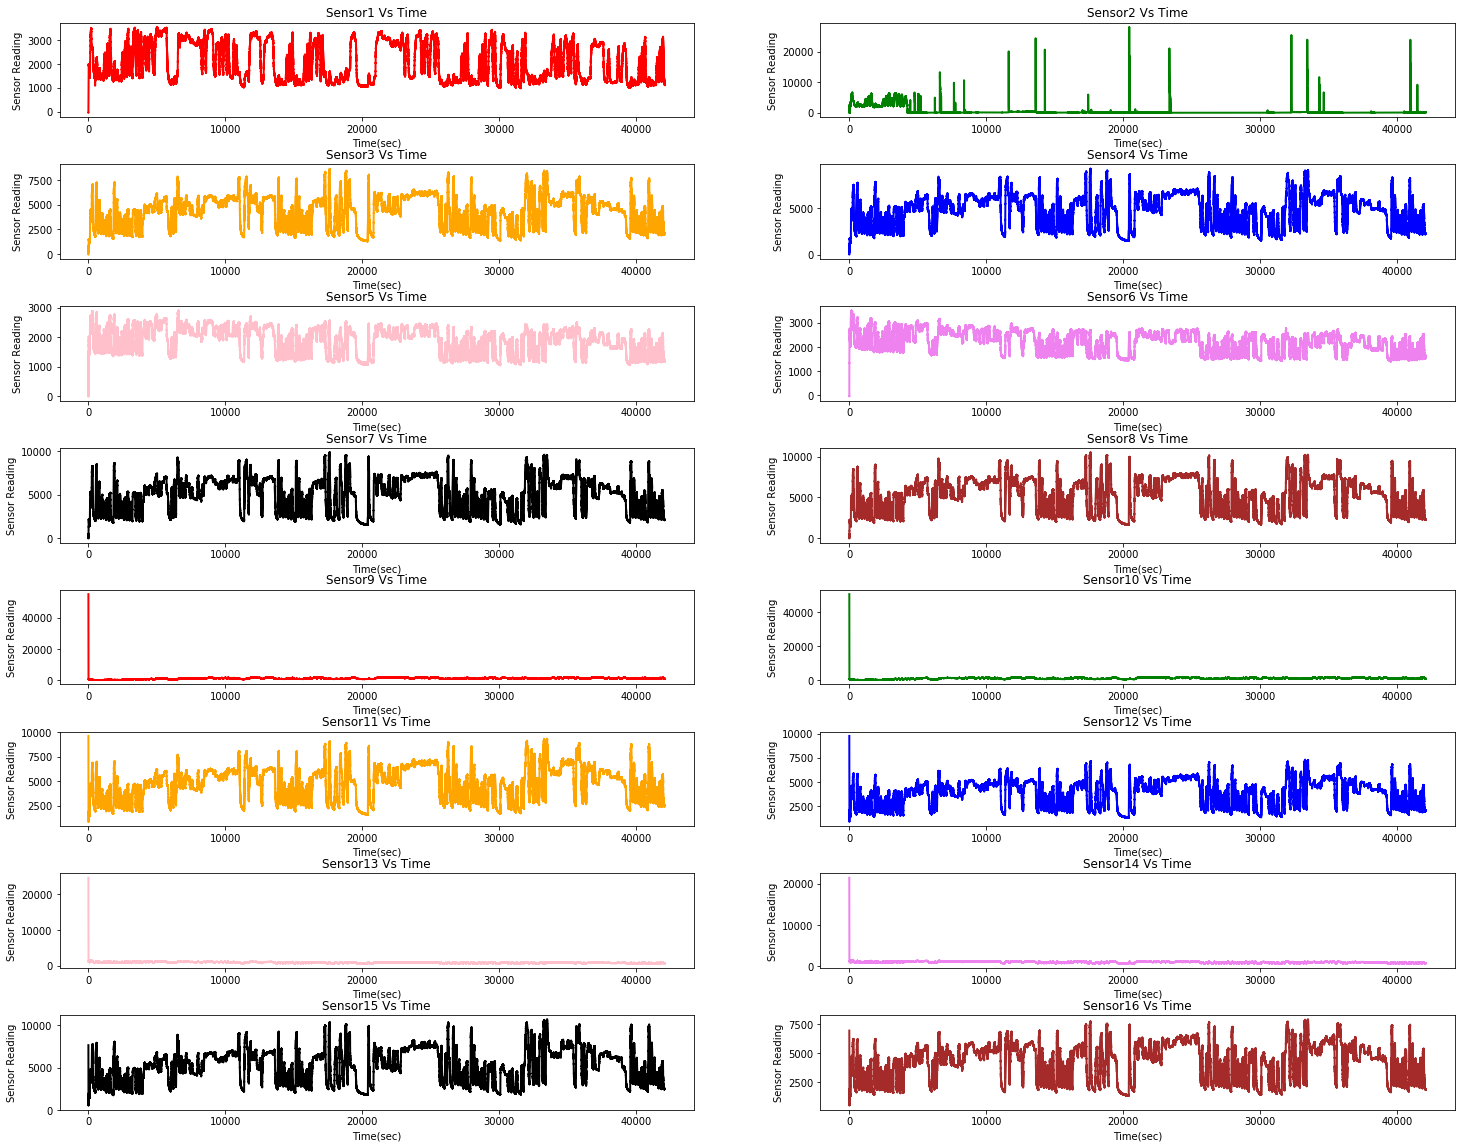

In [26]:
# Reference: https://github.com/shubham0420/Gas-Sensor-for-Home-Activity-Monitoring-Dataset/blob/master/code/main_code_notebook.ipynb

fig, axes = plt.subplots(nrows=8, ncols=2)#, sharex=True, sharey=True)
fig.set_figheight(20)
fig.set_figwidth(25)
fig.subplots_adjust(hspace=.5)

axes[0,0].plot(df['Time (seconds)'], df['Sensor1'], c = 'red',linewidth = '2.0')
axes[0,0].set_title('Sensor1 Vs Time')
axes[0,0].set_xlabel('Time(sec)')
axes[0,0].set_ylabel('Sensor Reading')

axes[0,1].plot(df['Time (seconds)'], df['Sensor2'], c = 'green',linewidth = '2.0')
axes[0,1].set_title('Sensor2 Vs Time')
axes[0,1].set_xlabel('Time(sec)')
axes[0,1].set_ylabel('Sensor Reading')

axes[1,0].plot(df['Time (seconds)'], df['Sensor3'], c = 'orange',linewidth = '2.0')
axes[1,0].set_title('Sensor3 Vs Time')
axes[1,0].set_xlabel('Time(sec)')
axes[1,0].set_ylabel('Sensor Reading')


axes[1,1].plot(df['Time (seconds)'], df['Sensor4'], c = 'blue',linewidth = '2.0')
axes[1,1].set_title('Sensor4 Vs Time')
axes[1,1].set_xlabel('Time(sec)')
axes[1,1].set_ylabel('Sensor Reading')


axes[2,0].plot(df['Time (seconds)'], df['Sensor5'], c = 'pink',linewidth = '2.0')
axes[2,0].set_title('Sensor5 Vs Time')
axes[2,0].set_xlabel('Time(sec)')
axes[2,0].set_ylabel('Sensor Reading')

axes[2,1].plot(df['Time (seconds)'], df['Sensor6'], c = 'violet',linewidth = '2.0')
axes[2,1].set_title('Sensor6 Vs Time')
axes[2,1].set_xlabel('Time(sec)')
axes[2,1].set_ylabel('Sensor Reading')

axes[3,0].plot(df['Time (seconds)'], df['Sensor7'], c = 'black',linewidth = '2.0')
axes[3,0].set_title('Sensor7 Vs Time')
axes[3,0].set_xlabel('Time(sec)')
axes[3,0].set_ylabel('Sensor Reading')

axes[3,1].plot(df['Time (seconds)'], df['Sensor8'], c = 'brown',linewidth = '2.0')
axes[3,1].set_title('Sensor8 Vs Time')
axes[3,1].set_xlabel('Time(sec)')
axes[3,1].set_ylabel('Sensor Reading')


axes[4,0].plot(df['Time (seconds)'], df['Sensor9'], c = 'red',linewidth = '2.0')
axes[4,0].set_title('Sensor9 Vs Time')
axes[4,0].set_xlabel('Time(sec)')
axes[4,0].set_ylabel('Sensor Reading')


axes[4,1].plot(df['Time (seconds)'], df['Sensor10'], c = 'green',linewidth = '2.0')
axes[4,1].set_title('Sensor10 Vs Time')
axes[4,1].set_xlabel('Time(sec)')
axes[4,1].set_ylabel('Sensor Reading')


axes[5,0].plot(df['Time (seconds)'], df['Sensor11'], c = 'orange',linewidth = '2.0')
axes[5,0].set_title('Sensor11 Vs Time')
axes[5,0].set_xlabel('Time(sec)')
axes[5,0].set_ylabel('Sensor Reading')

axes[5,1].plot(df['Time (seconds)'], df['Sensor12'], c = 'blue',linewidth = '2.0')
axes[5,1].set_title('Sensor12 Vs Time')
axes[5,1].set_xlabel('Time(sec)')
axes[5,1].set_ylabel('Sensor Reading')

axes[6,0].plot(df['Time (seconds)'], df['Sensor13'], c = 'pink',linewidth = '2.0')
axes[6,0].set_title('Sensor13 Vs Time')
axes[6,0].set_xlabel('Time(sec)')
axes[6,0].set_ylabel('Sensor Reading')

axes[6,1].plot(df['Time (seconds)'], df['Sensor14'], c = 'violet',linewidth = '2.0')
axes[6,1].set_title('Sensor14 Vs Time')
axes[6,1].set_xlabel('Time(sec)')
axes[6,1].set_ylabel('Sensor Reading')

axes[7,0].plot(df['Time (seconds)'], df['Sensor15'], c = 'black',linewidth = '2.0')
axes[7,0].set_title('Sensor15 Vs Time')
axes[7,0].set_xlabel('Time(sec)')
axes[7,0].set_ylabel('Sensor Reading')

axes[7,1].plot(df['Time (seconds)'], df['Sensor16'], c = 'brown',linewidth = '2.0')
axes[7,1].set_title('Sensor16 Vs Time')
axes[7,1].set_xlabel('Time(sec)')
axes[7,1].set_ylabel('Sensor Reading')



In [61]:
y=[]
for i in range(df.shape[0]):
    y.append(i)
    if(df['CO2 conc (ppm)'][i] == 0 and df['Ethylene conc (ppm)'][i] == 0):
        y[i] = 0
    elif(df['CO2 conc (ppm)'][i] != 0 and df['Ethylene conc (ppm)'][i] == 0):
        y[i] = 1
    elif(df['CO2 conc (ppm)'][i] == 0 and df['Ethylene conc (ppm)'][i] != 0):
        y[i] = 2
    elif(df['CO2 conc (ppm)'][i] != 0 and df['Ethylene conc (ppm)'][i] != 0):
        y[i] = 3
    else:
        y[i] = 4

In [62]:
print(np.min(y), np.max(y))

0 3


In [63]:
df['Response']=y
df['Response'].value_counts()

0    1249996
2    1201509
3     966564
1     790192
Name: Response, dtype: int64

In [12]:
df.corr()

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Response
Time (seconds),1.000000,-0.126286,0.002454,-0.238450,-0.359907,0.011923,0.002443,-0.316352,-0.376872,-0.012881,0.000011,0.415173,0.336411,0.133469,0.080574,-0.562204,-0.441421,0.128514,0.080925,-0.062838
CO2 conc (ppm),-0.126286,1.000000,-0.047660,0.640777,0.036445,0.222993,0.251904,0.525861,0.602067,0.243185,0.239346,0.376390,0.420993,0.194132,0.258245,0.487300,0.505342,0.133461,0.314003,0.398366
Ethylene conc (ppm),0.002454,-0.047660,1.000000,0.093180,-0.097146,0.618532,0.608274,0.465244,0.374582,0.655367,0.658543,0.207883,0.205653,0.607006,0.604001,0.260181,0.363509,0.665233,0.618667,0.808265
Sensor1,-0.238450,0.640777,0.093180,1.000000,0.079656,0.429825,0.465395,0.738866,0.792980,0.433277,0.427285,0.580552,0.661567,0.392684,0.462236,0.678290,0.715453,0.299436,0.494236,0.428247
Sensor2,-0.359907,0.036445,-0.097146,0.079656,1.000000,-0.047715,-0.038114,0.142630,0.189008,-0.046582,-0.051379,-0.356982,-0.322565,-0.092252,-0.065954,0.266016,0.171887,-0.090825,-0.074701,-0.120118
Sensor3,0.011923,0.222993,0.618532,0.429825,-0.047715,1.000000,0.998901,0.847995,0.746578,0.993775,0.993745,0.436260,0.458701,0.989949,0.993529,0.542728,0.702059,0.981820,0.984024,0.621402
Sensor4,0.002443,0.251904,0.608274,0.465395,-0.038114,0.998901,1.000000,0.865618,0.768603,0.992739,0.992551,0.451663,0.477313,0.987723,0.994124,0.563099,0.720630,0.974991,0.986416,0.628768
Sensor5,-0.316352,0.525861,0.465244,0.738866,0.142630,0.847995,0.865618,1.000000,0.983270,0.865296,0.859200,0.368604,0.437888,0.789664,0.843094,0.820720,0.905380,0.757808,0.864310,0.642695
Sensor6,-0.376872,0.602067,0.374582,0.792980,0.189008,0.746578,0.768603,0.983270,1.000000,0.768782,0.760743,0.334542,0.411276,0.679671,0.746543,0.851357,0.907797,0.639715,0.776151,0.597127
Sensor7,-0.012881,0.243185,0.655367,0.433277,-0.046582,0.993775,0.992739,0.865296,0.768782,1.000000,0.999689,0.425067,0.448790,0.977438,0.987019,0.564760,0.720530,0.979261,0.987604,0.663908


In [16]:
df.corr() > 0.9

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Response
Time (seconds),True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
CO2 conc (ppm),False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Ethylene conc (ppm),False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Sensor1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Sensor2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Sensor3,False,False,False,False,False,True,True,False,False,True,True,False,False,True,True,False,False,True,True,False
Sensor4,False,False,False,False,False,True,True,False,False,True,True,False,False,True,True,False,False,True,True,False
Sensor5,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False
Sensor6,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False
Sensor7,False,False,False,False,False,True,True,False,False,True,True,False,False,True,True,False,False,True,True,False


In [64]:
x=df[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y=df[['Response']]


/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


[0.11219743 0.0315956  0.0851861  0.08375901 0.08421252 0.06375352
 0.05943994 0.09657328 0.0515767  0.05930798 0.05392748 0.04965106
 0.02175097 0.01887013 0.07963259 0.04856569]


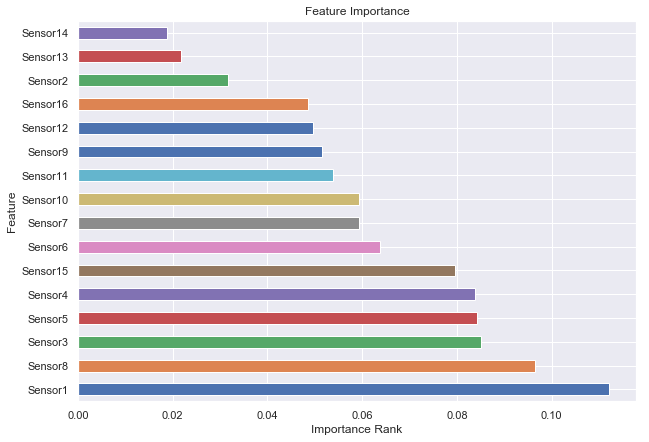

In [67]:
#Borrowed from https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

y_fs = y.astype('int64')
plt.figure(figsize=(10,7))
model = ExtraTreesClassifier()
model.fit(x,y_fs)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')

plt.xlabel('Importance Rank')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()



In [11]:
xtrain, xtest = x[:int(len(x) * 0.80)], x[int(len(x) * 0.80):] 
ytrain, ytest = y[:int(len(y) * 0.80)], y[int(len(y) * 0.80):] 

ytrain = ytrain.astype('int64')
ytest = ytest.astype('int64')


In [17]:
res = sm.RLM(ytrain, xtrain).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               Response   No. Observations:              3366608
Model:                            RLM   Df Residuals:                  3366592
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 14 May 2019                                         
Time:                        17:41:08                                         
No. Iterations:                    50                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Sensor1        0.0004   1.66e-06    243.000      0.000       0.000       0.000
Sensor2    -6.859e-05   2.46e-07   -279.082      0.000   -6.91e-05   -6.81e-05
Sensor3       -0.0039   1.21e-05   -318.870      0.000      -0.004      -0.004
Sensor4        0.0005   1.31e-05     34.323      0.000       0.000       0.000
Sensor5        0.0048    2.2e-05    218.251      0.000       0.005       0.005
Sensor6       -0.0040   1.37e-05   -293.296      0.000      -0.004      -0.004
Sensor7        0.0031   9.02e-06    346.633      0.000       0.003       0.003
Sensor8       -0.0004   1.04e-05    -43.240      0.000      -0.000      -0.000
Sensor9        0.0004    6.2e-06     62.575      0.000       0.000       0.000
Sensor10      -0.0002   7.36e-06    -31.164      0.000      -0.000      -0.000
Sensor11       0.0021   9.66e-06    222.461      0.000       0.002       0.002
Sensor12      -0.0029   1.04e-05   -280.892      0.000      -0.003      -0.003
Sensor13       0.0041   1.94e-05    209.520      0.000       0.004       0.004
Sensor14      -0.0032   2.26e-05   -141.968      0.000      -0.003      -0.003
Sensor15   -4.286e-05   4.89e-06     -8.756      0.000   -5.25e-05   -3.33e-05
Sensor16       0.0005   5.19e-06     99.302      0.000       0.001       0.001
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

# Remove Outliers

In [53]:
from scipy import stats
z=stats.zscore(df)

df_clean = df[(z < 3).all(axis=1)]

In [54]:
df_clean

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Response
469,4.68,0.0,0.0,825.86,1728.10,110.42,172.69,554.71,920.14,136.77,174.88,896.13,1202.68,1132.65,1142.75,1430.06,1496.58,735.63,653.17,0
475,4.75,0.0,0.0,835.79,1746.49,130.42,175.22,563.96,948.55,145.14,179.77,895.36,1182.09,1136.29,1146.39,1431.12,1471.46,721.02,651.50,0
476,4.76,0.0,0.0,841.14,1758.63,115.41,171.85,572.69,951.29,144.14,179.10,895.74,1191.87,1132.05,1143.15,1403.33,1487.98,717.28,635.28,0
478,4.78,0.0,0.0,848.61,1762.00,123.08,184.83,586.71,963.99,152.52,205.81,892.07,1174.77,1110.71,1137.50,1424.75,1488.62,715.97,637.30,0
479,4.79,0.0,0.0,870.49,1769.89,122.41,174.71,578.15,961.25,150.17,185.51,877.22,1182.70,1120.97,1125.40,1412.44,1474.67,729.25,627.18,0
480,4.80,0.0,0.0,835.79,1772.37,120.08,173.20,582.89,969.27,137.78,197.34,887.83,1175.99,1115.53,1131.04,1423.05,1462.47,712.79,642.83,0
482,4.82,0.0,0.0,856.47,1800.41,124.41,190.58,587.44,978.29,149.50,185.68,876.07,1169.28,1102.68,1137.29,1411.38,1455.63,711.67,638.96,0
483,4.83,0.0,0.0,859.92,1791.12,127.75,179.43,585.62,978.88,159.23,183.48,865.87,1169.69,1116.34,1107.50,1412.44,1463.76,722.33,630.86,0
484,4.83,0.0,0.0,867.03,1814.48,117.58,183.31,588.90,983.20,153.02,191.08,887.44,1160.97,1095.66,1134.27,1414.77,1460.33,692.47,634.54,0
485,4.85,0.0,0.0,865.11,1803.35,130.26,180.78,596.57,984.57,154.53,211.24,877.80,1159.75,1100.07,1119.56,1416.68,1465.04,708.68,624.24,0


In [13]:
x_clean=df_clean[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y_clean=df_clean[['Response']]

xtrain_c, xtest_c = x_clean[:int(len(x_clean) * 0.80)], x_clean[int(len(x_clean) * 0.80):] 
ytrain_c, ytest_c = y_clean[:int(len(y_clean) * 0.80)], y_clean[int(len(y_clean) * 0.80):] 

ytrain_c = ytrain_c.astype('int64')
ytest_c = ytest_c.astype('int64')


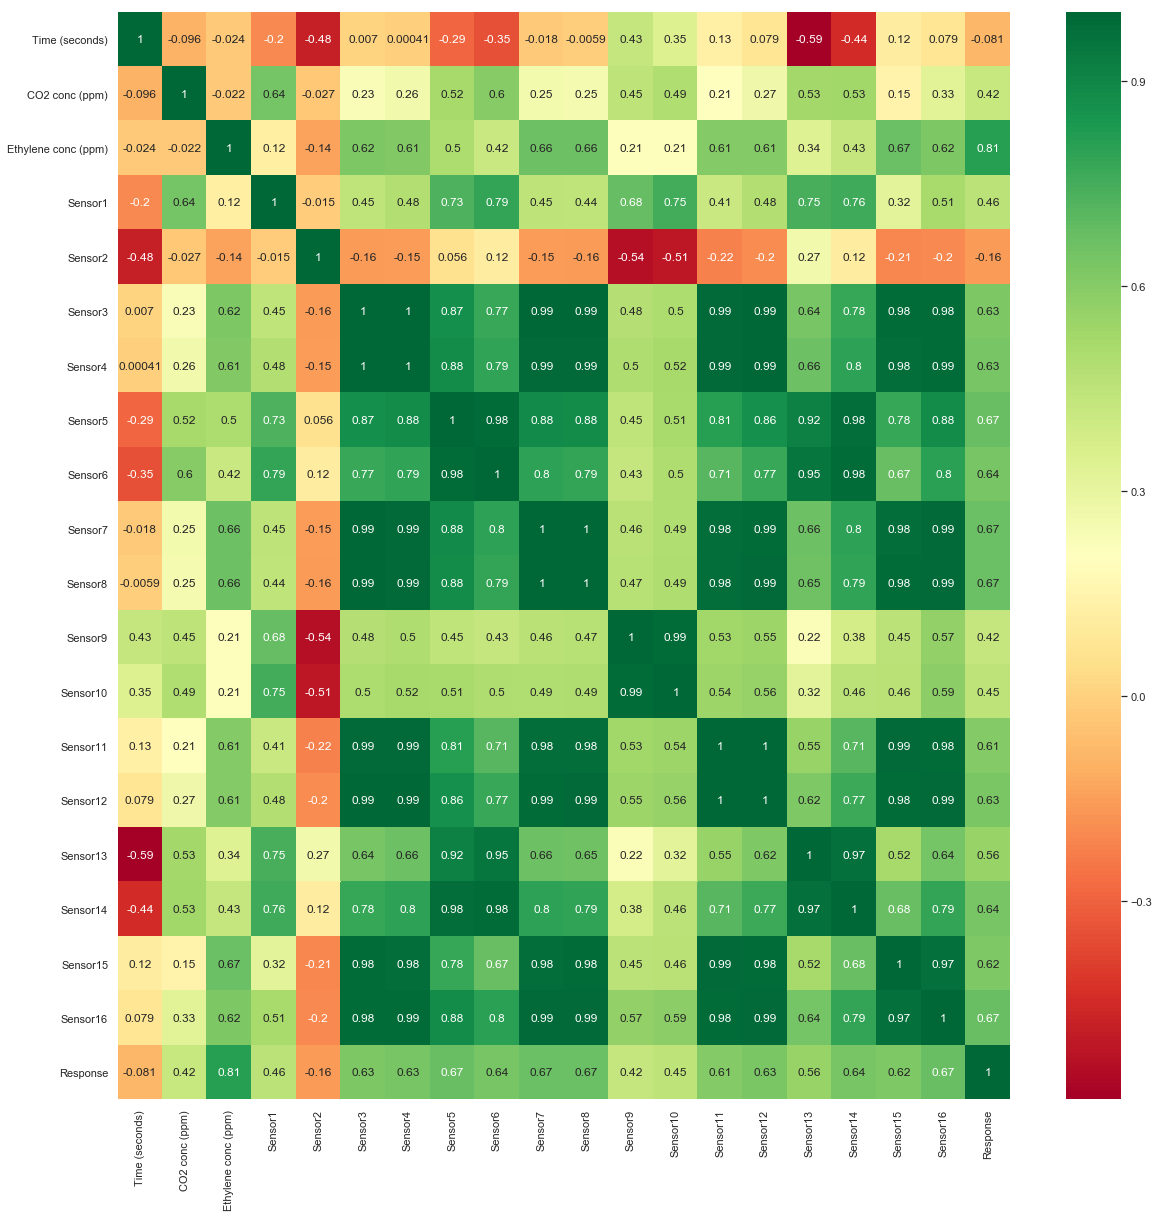

In [28]:
import seaborn as sns


#get correlations of each features in dataset
corrmat = df_clean.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_clean[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [50]:
df['Response'].value_counts()

0    1249996
2    1201509
3     966564
1     790192
Name: Response, dtype: int64

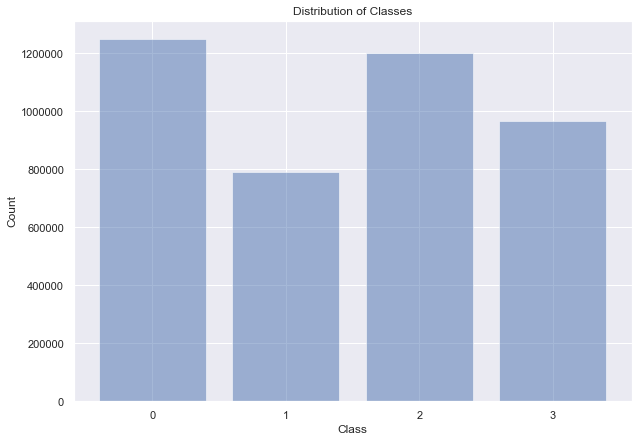

In [57]:
import matplotlib.pyplot as plt
x=[0, 1, 2, 3]
y=[1249996, 790192, 1201509, 966564]


classes = ('0', '1', '2', '3')
plt.figure(figsize=(10,7))
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, classes)
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Distribution of Classes')

plt.show()

# Normalize

In [21]:
#Normalize data to be between 0 and 1
from sklearn import preprocessing

x_clean_norm = preprocessing.normalize(x_clean)

xtrain_cn, xtest_cn = x_clean_norm[:int(len(x_clean_norm) * 0.80)], x_clean_norm[int(len(x_clean_norm) * 0.80):] 

# K-Fold Validation

In [62]:
#K=5
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures


folds=5
elements=len(df_clean.index)
p_order=np.arange(1,11)
r_state=np.arange(0,3)

X, Y=np.meshgrid(p_order, r_state, indexing='ij')
Z=np.zeros((p_order.size,r_state.size))

regr=skl_lm.LogisticRegression(solver="lbfgs")

for(i,j),v in np.ndenumerate(Z):
    poly=PolynomialFeatures(X[i,j])
    X_poly=poly.fit_transform(x_clean)
    kf_5=KFold(n_splits=folds,shuffle=True,random_state=Y[i,j])
    # shuffle = Ture ==> the data is shuffled each time.
    Z[i,j]=cross_val_score(regr, X_poly, y_clean, cv=kf_5, scoring='neg_mean_squared_error')

/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWar

ValueError: setting an array element with a sequence.

In [ ]:
fig, ax1
ax1.plot(X,Z*-1,'-o')ax2.set_title('5-fold CV')
ax1.set_ylabel('Mean Squared Error')
ax1.set_xlabel('Degree of Polynomial')
ax1.set_xticks(range(2,11,2));

# KNN

In [31]:
#K=1 neighbors Full dataset
from sklearn.neighbors import KNeighborsClassifier

knn_clf1=KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=1)
knn_clf1.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=1, p=2,weights='distance')


y_knn_pred1=knn_clf1.predict(xtest)

print('Accuracy Score =', accuracy_score(ytest, y_knn_pred1))
print('MSE =', mean_squared_error(ytest, y_knn_pred1))

/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Accuracy Score = 0.6339536602376514
MSE = 1.0045232417635297


In [32]:
#K=5 neighbors Full dataset
knn_clf5=KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=5)
knn_clf5.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=5, p=2,weights='distance')


y_knn_pred5=knn_clf5.predict(xtest)

print('Accuracy Score =', accuracy_score(ytest, y_knn_pred5))
print('MSE =', mean_squared_error(ytest, y_knn_pred5))



/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score = 0.6366257828344936
MSE = 0.9941911928074871


In [33]:
#10 neighbors Full dataset

knn_clf10=KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=10)
knn_clf10.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=10, p=2,weights='distance')


y_knn_pred10=knn_clf10.predict(xtest)

print('Accuracy Score =', accuracy_score(ytest, y_knn_pred10))
print('MSE =', mean_squared_error(ytest, y_knn_pred10))


/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy Score = 0.638716905898274
MSE = 0.988028320459857


In [41]:
#100 neighbors Full dataset
knn_clf100=KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=100)
knn_clf100.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=100, p=2,weights='distance')


y_knn_pred100=knn_clf100.predict(xtest)

print('Accuracy Score =', accuracy_score(ytest, y_knn_pred100))
print('MSE =', mean_squared_error(ytest, y_knn_pred100))


/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score = 0.6450888905522822
MSE = 0.9651198296685214


In [34]:
#1000 neighbors Full dataset
knn_clf1000=KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=1000)
knn_clf1000.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=1000, p=2,weights='distance')


y_knn_pred1000=knn_clf1000.predict(xtest)

print('Accuracy Score =', accuracy_score(ytest, y_knn_pred1000))
print('MSE =', mean_squared_error(ytest, y_knn_pred1000))


/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score = 0.659243179790246
MSE = 0.9223920071573439


In [92]:
#1000 neighbors CLEANED dataset
from sklearn.neighbors import KNeighborsClassifier
knn_clf1000=KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=1000)
knn_clf1000.fit(xtrain_c, ytrain_c)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=1000, p=2,weights='distance')


y_knn_pred1000_c=knn_clf1000.predict(xtest_c)

print('Accuracy Score =', accuracy_score(ytest_c, y_knn_pred1000_c))
print('MSE =', mean_squared_error(ytest_c, y_knn_pred1000_c))


/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy Score = 0.6646458426494054
MSE = 0.9031214033853079


In [93]:
conf_mx = confusion_matrix(ytest_c,y_knn_pred1000_c)
print(conf_mx)

[[161756  12350  28706   2335]
 [  8832 109314   5085   6382]
 [ 97295   4419 191890  16326]
 [  3516   6916  82318  81038]]


In [94]:
from sklearn.metrics import classification_report
print(classification_report(ytest_c,y_knn_pred1000_c))

              precision    recall  f1-score   support

           0       0.60      0.79      0.68    205147
           1       0.82      0.84      0.83    129613
           2       0.62      0.62      0.62    309930
           3       0.76      0.47      0.58    173788

   micro avg       0.66      0.66      0.66    818478
   macro avg       0.70      0.68      0.68    818478
weighted avg       0.68      0.66      0.66    818478



# SVM

In [36]:
#Borrowed from https://github.com/shubham0420/Gas-Sensor-for-Home-Activity-Monitoring-Dataset/blob/master/code/main_code_notebook.ipynb

#Every 1 second
from sklearn.svm import SVC

df_100 = df[df.index % 100 == 0] 

x_100=df_100[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y_100=df_100[['Response']]

xtrain_100, xtest_100 = x_100[:int(len(x_100) * 0.80)], x_100[int(len(x_100) * 0.80):] 
ytrain_100, ytest_100 = y_100[:int(len(y_100) * 0.80)], y_100[int(len(y_100) * 0.80):] 

ytrain_100 = ytrain_100.astype('int64')
ytest_100 = ytest_100.astype('int64')

C_2d_range = [1e-2]
gamma_2d_range = [1e-1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(xtrain_100, ytrain_100)
        classifiers.append((C, gamma, clf))
        
y_svm_100=clf.predict(xtest_100)
        
print('Accuracy Score =', accuracy_score(ytest_100, y_svm_100))
print('MSE =', mean_squared_error(ytest_100, y_svm_100))


/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score = 0.24593085422359512
MSE = 3.629440418201259


In [63]:
#Every 0.1 seconds
df_10 = df[df.index % 10 == 0] 

x_10=df_10[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y_10=df_10[['Response']]

xtrain_10, xtest_10 = x_10[:int(len(x_10) * 0.80)], x_10[int(len(x_10) * 0.80):] 
ytrain_10, ytest_10 = y_10[:int(len(y_10) * 0.80)], y_10[int(len(y_10) * 0.80):] 

ytrain_10 = ytrain_10.astype('int64')
ytest_10 = ytest_10.astype('int64')

C_2d_range = [.1e-2]
gamma_2d_range = [1e-1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(xtrain_10, ytrain_10)
        classifiers.append((C, gamma, clf))

y_svm_10=clf.predict(xtest_10)
        
print('Accuracy Score =', accuracy_score(ytest_10, y_svm_10))
print('MSE =', mean_squared_error(ytest_10, y_svm_10))


/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score = 0.24601382981251338
MSE = 3.6291376565358933


In [52]:
#Cleaned Every 0.1 Seconds
from sklearn.svm import SVC
C_2d_range = [.1e-2]
gamma_2d_range = [1e-1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(xtrain_c_10, ytrain_c_10)
        classifiers.append((C, gamma, clf))

y_svm_c_10=clf.predict(xtest_c_10)
        
print('Accuracy Score =', accuracy_score(ytest_c_10, y_svm_c_10))
print('MSE =', mean_squared_error(ytest_c_10, y_svm_c_10))


/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score = 0.2506414172266341
MSE = 3.584202810018326


# Logistic Regression

In [88]:
#Full dataset
import sklearn.linear_model as skl_lm
clf=skl_lm.LogisticRegression(solver='newton-cg')


clf.fit(xtrain,ytrain)
print(clf)
print('classes:',clf.classes_)
print('coefficients:',clf.coef_)
print('intercept :', clf.intercept_)

y_lg_pred=clf.predict(xtest)

print('Accuracy Score =', accuracy_score(ytest, y_lg_pred))
print('MSE =', mean_squared_error(ytest, y_lg_pred))


/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
classes: [0 1 2 3]
coefficients: [[ 5.76391595e-05  1.10856396e-04 -4.31875172e-03  8.20287046e-03
  -8.56473289e-03 -5.85186591e-03 -1.57798603e-03  2.43634366e-03
   4.93504052e-03 -8.51418507e-03 -4.12486606e-03  1.97217083e-02
  -2.04678515e-03  5.22459364e-03 -6.75469108e-03 -7.98103039e-03]
 [-3.15637336e-03 -5.21590822e-05  2.77919090e-02 -1.19048048e-02
   1.56791124e-02  5.67919189e-04 -1.37258087e-02 -1.18085842e-03
  -3.29597632e-03  5.90144303e-03 -7.31469458e-03 -2.89308796e-03
  -1.19747930e-02  2.43701752e-03 -2.46920383e-03  1.30882893e-02]
 [ 4.37892688e-03  1.35339730e-04 -6.36029300e-03 -2.38762278e-03
  -1.70747695e-03 -1.48464657e-03  4.43304559e-03  2.48840514e-03
  -2.32994061e-03  2.28335298e-03 -5

In [89]:
conf_mx = confusion_matrix(ytest, y_lg_pred)
print(conf_mx)

[[173682  16036  16354    984]
 [ 10496 107561   2003   9738]
 [ 24144      1 275062  24492]
 [     0   5245  17467 158388]]


In [90]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_lg_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84    207056
           1       0.83      0.83      0.83    129798
           2       0.88      0.85      0.87    323699
           3       0.82      0.87      0.85    181100

   micro avg       0.85      0.85      0.85    841653
   macro avg       0.84      0.85      0.85    841653
weighted avg       0.85      0.85      0.85    841653



In [44]:
#Full dataset every 0.1 seconds
import sklearn.linear_model as skl_lm

df_10 = df[df.index % 10 == 0] 

x_10=df_10[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y_10=df_10[['Response']]

xtrain_10, xtest_10 = x_10[:int(len(x_10) * 0.80)], x_10[int(len(x_10) * 0.80):] 
ytrain_10, ytest_10 = y_10[:int(len(y_10) * 0.80)], y_10[int(len(y_10) * 0.80):] 

ytrain_10 = ytrain_10.astype('int64')
ytest_10 = ytest_10.astype('int64')

clf=skl_lm.LogisticRegression(solver='newton-cg')


clf.fit(xtrain_10,ytrain_10)
print(clf)
print('classes:',clf.classes_)
print('coefficients:',clf.coef_)
print('intercept :', clf.intercept_)

y_lg_pred=clf.predict(xtest_10)

print('Accuracy Score =', accuracy_score(ytest_10, y_lg_pred))
print('MSE =', mean_squared_error(ytest_10, y_lg_pred))


/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
classes: [0 1 2 3]
coefficients: [[ 1.02852528e-04  1.11508051e-04 -4.59999962e-03  8.69081166e-03
  -9.27170921e-03 -6.05756966e-03 -1.68849163e-03  2.49878027e-03
   4.74171952e-03 -8.45249944e-03 -4.61225393e-03  2.01822631e-02
  -1.75932790e-03  5.44779949e-03 -6.80603216e-03 -7.80463534e-03]
 [-3.16542851e-03 -5.36188202e-05  2.81709375e-02 -1.23463964e-02
   1.66264827e-02  1.25134500e-04 -1.36930743e-02 -1.30850696e-03
  -3.29796557e-03  5.91669227e-03 -7.23014947e-03 -2.90126148e-03
  -1.19802549e-02  2.05610395e-03 -2.44372603e-03  1.30963602e-02]
 [ 4.36979386e-03  1.35967018e-04 -6.33826849e-03 -2.58284950e-03
  -1.09901466e-03 -1.85987460e-03  4.49351099e-03  2.49570677e-03
  -2.33985605e-03  2.31177231e-03 -5

/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [38]:
#After Cleaning
clf=skl_lm.LogisticRegression(solver='newton-cg')


clf.fit(xtrain_c,ytrain_c)
print(clf)
print('classes:',clf.classes_)
print('coefficients:',clf.coef_)
print('intercept :', clf.intercept_)

y_lg_pred_c=clf.predict(xtest_c)

print('Accuracy Score =', accuracy_score(ytest_c, y_lg_pred_c))
print('MSE =', mean_squared_error(ytest_c, y_lg_pred_c))

/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
classes: [0 1 2 3]
coefficients: [[-5.08895939e-05  6.45847931e-04 -9.13865626e-04  1.75189430e-03
  -1.29712256e-02 -3.68880415e-03  5.11771603e-03 -5.89911063e-04
   5.18938453e-04 -4.32169849e-03 -6.25745398e-03  3.10073832e-02
  -1.65668048e-02  9.18299686e-03 -9.87944139e-03 -1.12070596e-02]
 [-3.15810151e-03 -2.31511558e-04  2.65947683e-02 -1.13718176e-02
   2.09054541e-02  1.39444591e-03 -1.08496039e-02 -5.11317286e-03
  -2.21048502e-03  4.90799789e-03 -9.47818767e-03  1.32819520e-03
  -1.56458701e-02 -1.46255295e-03 -5.90299628e-04  1.06562461e-02]
 [ 4.41359218e-03  1.57961376e-04 -5.27537913e-03 -1.45540579e-03
  -4.36562402e-03 -4.77454415e-03  3.06796066e-03  2.86041920e-03
  -7.43960986e-04  1.06929841e-03 -5

In [27]:
#After Cleaning and Normalizing
import sklearn.linear_model as skl_lm

clf=skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(xtrain_cn,ytrain_c)
print(clf)
print('classes:',clf.classes_)
print('coefficients:',clf.coef_)
print('intercept :', clf.intercept_)

y_lg_pred_cn=clf.predict(xtest_cn)

print('Accuracy Score =', accuracy_score(ytest_c, y_lg_pred_cn))
print('MSE =', mean_squared_error(ytest_c, y_lg_pred_cn))

/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
classes: [0 1 2 3]
coefficients: [[ -27.38431308   -6.47038545   47.7199337   -14.32213975  -45.40301432
    16.58076166   39.89849516  -98.32715185   62.28577367  -56.32834382
    29.65298677   58.60038446   -8.71778795   32.95766486  -68.50272861
  -105.98263125]
 [  -7.86676616   10.70459706  101.544909     35.36587197   67.2913374
    35.77659188  -47.75488069  -10.84140913  -16.49952025   24.57933343
   -42.08906209   46.55896941  -32.51233804   -6.73049156  -19.41619626
   169.42689674]
 [  41.4784374     3.54647148  -29.66149792  -58.60467265  -29.7303932
   -37.35225894    9.72716833   68.08556375  -51.48557373   44.85342594
   -52.25210892  -18.28305562   37.92874908    3.75284079  142.59146523
  -113.30909044]
 

# LDA

In [79]:
#Full dataset
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

LDA=LinearDiscriminantAnalysis(solver='svd')
y_lda_pred=LDA.fit(xtrain, ytrain).predict(xtest)

print('Accuracy Score =', accuracy_score(ytest, y_lda_pred))
print('MSE =', mean_squared_error(ytest, y_lda_pred))

/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score = 0.8160096857018272
MSE = 0.4656574621607717


In [80]:
#After Cleaning
LDA=LinearDiscriminantAnalysis(solver='svd')
y_lda_pred_c=LDA.fit(xtrain_c, ytrain_c).predict(xtest_c)

print('Accuracy Score =', accuracy_score(ytest_c, y_lda_pred_c))
print('MSE =', mean_squared_error(ytest_c, y_lda_pred_c))

/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score = 0.8160194898335691
MSE = 0.46806755954344526


In [84]:
conf_mx = confusion_matrix(ytest_c, y_lda_pred_c)
print(conf_mx)


[[168486  19343  17112    206]
 [ 10515 110856   1796   6446]
 [ 26497    631 257473  25329]
 [     0  26902  15807 131079]]


In [85]:
from sklearn.metrics import classification_report
print(classification_report(ytest_c,y_lda_pred_c))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82    205147
           1       0.70      0.86      0.77    129613
           2       0.88      0.83      0.86    309930
           3       0.80      0.75      0.78    173788

   micro avg       0.82      0.82      0.82    818478
   macro avg       0.80      0.82      0.81    818478
weighted avg       0.82      0.82      0.82    818478



In [46]:
#Cleaned and every 10 samples (0.1 seconds)
df_clean_10 = df_clean[df_clean.index % 10 == 0] 

x_c_10=df_clean_10[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y_c_10=df_clean_10[['Response']]

xtrain_c_10, xtest_c_10 = x_c_10[:int(len(x_c_10) * 0.80)], x_c_10[int(len(x_c_10) * 0.80):] 
ytrain_c_10, ytest_c_10 = y_c_10[:int(len(y_c_10) * 0.80)], y_c_10[int(len(y_c_10) * 0.80):] 

ytrain_c_10 = ytrain_c_10.astype('int64')
ytest_c_10 = ytest_c_10.astype('int64')

LDA=LinearDiscriminantAnalysis(solver='svd')
y_lda_pred_c=LDA.fit(xtrain_c_10, ytrain_c_10).predict(xtest_c_10)

print('Accuracy Score =', accuracy_score(ytest_c_10, y_lda_pred_c))
print('MSE =', mean_squared_error(ytest_c_10, y_lda_pred_c))

/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score = 0.8156383628588882
MSE = 0.46926084300549786


In [48]:
#Full dataset LSQR solver
LDA=LinearDiscriminantAnalysis(solver='lsqr')
y_lda_pred=LDA.fit(xtrain, ytrain).predict(xtest)

print('Accuracy Score =', accuracy_score(ytest, y_lda_pred))
print('MSE =', mean_squared_error(ytest, y_lda_pred))

/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score = 0.8160096857018272
MSE = 0.4656574621607717


# QDA

In [49]:
#Full Dataset
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(xtrain,ytrain)
y_qda_pred=qda_clf.fit(xtrain, ytrain).predict(xtest)

print('Accuracy Score =', accuracy_score(ytest, y_qda_pred))
print('MSE =', mean_squared_error(ytest, y_qda_pred))

/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score = 0.8210497675407799
MSE = 0.42349875780161184


In [50]:
#Clean Dataset
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(xtrain_c,ytrain_c)
y_qda_pred=qda_clf.fit(xtrain_c, ytrain_c).predict(xtest_c)

print('Accuracy Score =', accuracy_score(ytest_c, y_qda_pred))
print('MSE =', mean_squared_error(ytest_c, y_qda_pred))

/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score = 0.8284633185009249
MSE = 0.3996491048018395


In [69]:
#Clean, every 0.1 seconds
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

df_clean_10 = df_clean[df_clean.index % 10 == 0] 

x_c_10=df_clean_10[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y_c_10=df_clean_10[['Response']]

xtrain_c_10, xtest_c_10 = x_c_10[:int(len(x_c_10) * 0.80)], x_c_10[int(len(x_c_10) * 0.80):] 
ytrain_c_10, ytest_c_10 = y_c_10[:int(len(y_c_10) * 0.80)], y_c_10[int(len(y_c_10) * 0.80):] 

ytrain_c_10 = ytrain_c_10.astype('int64')
ytest_c_10 = ytest_c_10.astype('int64')

qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(xtrain_c_10,ytrain_c_10)
y_qda_pred_10=qda_clf.fit(xtrain_c_10, ytrain_c_10).predict(xtest_c_10)

print('Accuracy Score =', accuracy_score(ytest_c_10, y_qda_pred_10))
print('MSE =', mean_squared_error(ytest_c_10, y_qda_pred_10))

/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/timothyyu/dev/protein-atlas/env/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score = 0.8287599266951741
MSE = 0.39953573610262677


In [83]:
conf_mx = confusion_matrix(ytest_c_10, y_qda_pred_10)
print(conf_mx)


[[16343  2263  1840    69]
 [ 1285 10391   182  1103]
 [ 2480     0 26118  2394]
 [    4   611  1785 14982]]


In [73]:
from sklearn.metrics import classification_report
print(classification_report(ytest_c_10,y_qda_pred_10))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80     20515
           1       0.78      0.80      0.79     12961
           2       0.87      0.84      0.86     30992
           3       0.81      0.86      0.83     17382

   micro avg       0.83      0.83      0.83     81850
   macro avg       0.82      0.83      0.82     81850
weighted avg       0.83      0.83      0.83     81850

